### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
df = pd.read_csv('online_retail_II.csv')

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Section 1

### Create New Feature: Year

In [ ]:
df['year']= pd.DatetimeIndex(df['InvoiceDate']).year

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Filtering Data

In [ ]:
sales=df[(df['Quantity']>=1) & ~(df['Invoice'].str.contains('C'))]

In [ ]:
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Create New Feature: Revenue

In [ ]:
sales['Revenue']=sales['Quantity']*sales['Price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### Average of Revenue per Year

In [ ]:
average = sales.groupby('year')['Revenue'].mean().reset_index()
average

,year,Revenue
0,2009,18.713273
1,2010,19.908987
2,2011,20.058767


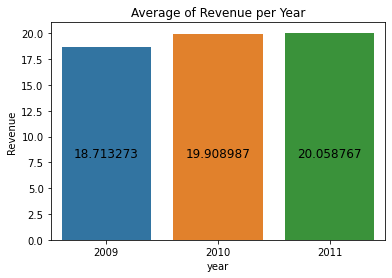

In [ ]:
sns.barplot(x='year', y='Revenue', data=average)
plt.title('Average of Revenue per Year')
plt.text(x = 0, y = 8, s = "18.713273", ha='center', fontsize = 12,color = 'black')
plt.text(x = 1, y = 8, s = "19.908987", ha='center', fontsize = 12,color = 'black')
plt.text(x = 2, y = 8, s = "20.058767", ha='center', fontsize = 12,color = 'black')
plt.show()

### Interpretation

Dari output di atas dapat disimpulkan bahwa revenue terendah terjadi pada tahun 2009 dengan rata-rata sebesar 18.7123273 dan tertinggi pada tahun 2011 dengan rata-rata revenue sebesar 20.058767, serta revenue mengalami kenaikan setiap tahunnya.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [ ]:
finished=sales[sales['Customer ID'].notna()]

In [ ]:
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


#### Customers who canceled their purchases

In [ ]:
canceled=df[(df['Invoice'].str.contains('C'))]

In [ ]:
canceled

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

In [ ]:
finished_each_year=finished.groupby('year')['Invoice'].count()

In [ ]:
finished_each_year

year
2009     30761
2010    403094
2011    371765
Name: Invoice, dtype: int64

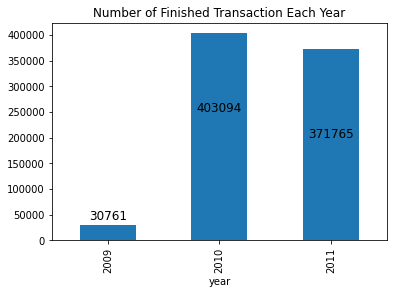

In [ ]:
finished_each_year.plot(x='year',y='Invoice',kind='bar')
plt.title('Number of Finished Transaction Each Year')
plt.text(x = 0, y = 40000, s = "30761", ha='center', fontsize = 12,color = 'black')
plt.text(x = 1, y = 250000, s = "403094", ha='center', fontsize = 12,color = 'black')
plt.text(x = 2, y = 200000, s = "371765", ha='center', fontsize = 12,color = 'black')
plt.show()

In [ ]:
canceled_each_year=canceled.groupby('year')['Invoice'].count()

In [ ]:
canceled_each_year

year
2009    1015
2010    9919
2011    8560
Name: Invoice, dtype: int64

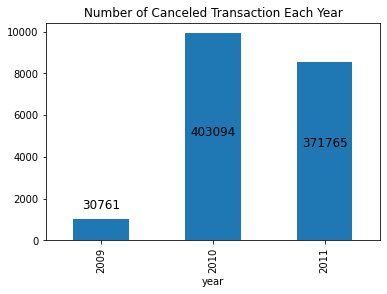

In [ ]:
canceled_each_year.plot(x='year',y='Invoice',kind='bar')
plt.title('Number of Canceled Transaction Each Year')
plt.text(x = 0, y = 1500, s = "30761", ha='center', fontsize = 12,color = 'black')
plt.text(x = 1, y = 5000, s = "403094", ha='center', fontsize = 12,color = 'black')
plt.text(x = 2, y = 4500, s = "371765", ha='center', fontsize = 12,color = 'black')
plt.show()

### Cancellation Rate

In [ ]:
(canceled_each_year/sum(canceled_each_year)) *100

year
2009     5.206730
2010    50.882323
2011    43.910947
Name: Invoice, dtype: float64

### Interpretation

Dari output canceled_each_year dan cancellation_rate dapat diperoleh bahwa persentase pelanggan yang melakukan pembatalan order tertinggi terjadi pada tahun 2010 dengan jumlah 9919 pelanggan dengan persentase sebesar 50.88%, dan terendah terjadi pada tahun 2009 dengan jumlah 1015 pelanggan dengan persentase sebesar 5.21%. Serta semakin tinggi persentase pembatalan, maka semakin tinggi juga jumlah pelanggan yang melakukan pembatalan.